In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import random

import pandas as pd
import matplotlib.pyplot as plt


# GroupBy

In [2]:
random.seed(233)

number = [random.randint(10, 100) for _ in range(10)]
size = [random.choices(["M", "L", "XL"], k=10)]

s = pd.Series(number, index=size, name="number").rename_axis("size")
s.head()

size
M       97
XL      90
XL      32
M       77
XL      39
Name: number, dtype: int64

In [3]:
s.groupby(level=0).sum()

size
L      23
M     230
XL    312
Name: number, dtype: int64

In [4]:
df = s.to_frame().reset_index()
df.head()

,size,number
0,M,97
1,XL,90
2,XL,32
3,M,77
4,XL,39


In [5]:
df.groupby("size")["number"].sum()

size
L      23
M     230
XL    312
Name: number, dtype: int64

### GroupBy 的一些使用场景

In [6]:
iris = pd.read_csv("../../data/iris.csv")
iris.columns = iris.columns.str.replace(".", "_")

/var/folders/0t/s0c95rbs6ds7w_b0d471p0kc0000gn/T/ipykernel_9426/460248279.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  iris.columns = iris.columns.str.replace(".", "_")


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


#### 自定义函数

In [9]:
def rank_by_sepal(group):
    df = group.copy()
    df["weight"] = 0.8*df["sepal_width"] + 0.2*df["sepal_length"]
    return df["weight"].rank()


iris.groupby("variety").apply(rank_by_sepal).reset_index(level=0)

,variety,weight
0,Setosa,32.5
1,Setosa,7.0
2,Setosa,15.5
3,Setosa,8.5
4,Setosa,36.0
...,...,...
145,Virginica,26.0
146,Virginica,4.0
147,Virginica,23.0
148,Virginica,43.0


In [10]:
iris.groupby("variety").apply(lambda grp: rank_by_sepal(grp)).reset_index(level=0)

,variety,weight
0,Setosa,32.5
1,Setosa,7.0
2,Setosa,15.5
3,Setosa,8.5
4,Setosa,36.0
...,...,...
145,Virginica,26.0
146,Virginica,4.0
147,Virginica,23.0
148,Virginica,43.0


#### 分组排序求前 TOP N

In [11]:
iris.groupby("variety").apply(
    lambda grp: grp.sort_values(["sepal_length", "sepal_width"], ascending=False)
        .head(2),
)

sepal_length  sepal_width  petal_length  petal_width  \
variety                                                                
Setosa     14            5.8          4.0           1.2          0.2   
           15            5.7          4.4           1.5          0.4   
Versicolor 50            7.0          3.2           4.7          1.4   
           52            6.9          3.1           4.9          1.5   
Virginica  131           7.9          3.8           6.4          2.0   
           117           7.7          3.8           6.7          2.2   

                   variety  
variety                     
Setosa     14       Setosa  
           15       Setosa  
Versicolor 50   Versicolor  
           52   Versicolor  
Virginica  131   Virginica  
           117   Virginica

In [12]:
iris.groupby("variety").head(2)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
100,6.3,3.3,6.0,2.5,Virginica
101,5.8,2.7,5.1,1.9,Virginica


In [13]:
iris.groupby("variety").tail(1)

,sepal_length,sepal_width,petal_length,petal_width,variety
49,5.0,3.3,1.4,0.2,Setosa
99,5.7,2.8,4.1,1.3,Versicolor
149,5.9,3.0,5.1,1.8,Virginica


#### 分组聚合

In [14]:
normalize = lambda x: (x - x.mean()) / x.std()

iris.set_index("variety").groupby(level=0).transform(normalize)

,sepal_length,sepal_width,petal_length,petal_width
variety,,,,
Setosa,0.266674,0.189941,-0.357011,-0.436492
Setosa,-0.300718,-1.129096,-0.357011,-0.436492
Setosa,-0.868111,-0.601481,-0.932836,-0.436492
Setosa,-1.151807,-0.865288,0.218813,-0.436492
Setosa,-0.017022,0.453749,-0.357011,-0.436492
...,...,...,...,...
Virginica,0.176134,0.080621,-0.637803,0.997633
Virginica,-0.452916,-1.469783,-1.000191,-0.458766
Virginica,-0.138391,0.080621,-0.637803,-0.094666


In [15]:
iris.groupby("variety").agg(
    count = ("variety", "count"),
    min = ("sepal_length", min),
    std = ("sepal_length", "std"),
    max = ("sepal_length", max),
)

,count,min,std,max
variety,,,,
Setosa,50,4.3,0.352490,5.8
Versicolor,50,4.9,0.516171,7.0
Virginica,50,4.9,0.635880,7.9


In [16]:
# equal to:

data = []
groups = iris["variety"].unique()
for group in groups:
    df = iris[iris["variety"] == group]
    stats = pd.DataFrame(
        dict(
            count = df.shape[0],
            min = df["sepal_length"].min(),
            std = df["sepal_length"].std(),
            max = df["sepal_length"].max(),
        ),
        index=[group],
    )
    data.append(stats)

pd.concat(data)


,count,min,std,max
Setosa,50,4.3,0.352490,5.8
Versicolor,50,4.9,0.516171,7.0
Virginica,50,4.9,0.635880,7.9


#### 分组绘制可视化图形

variety
Setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

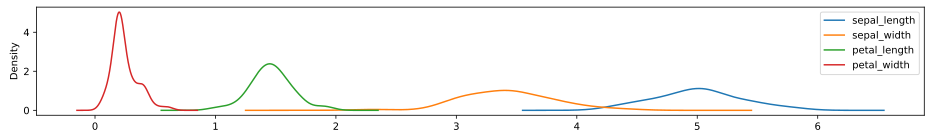

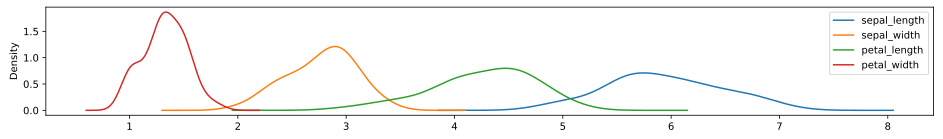

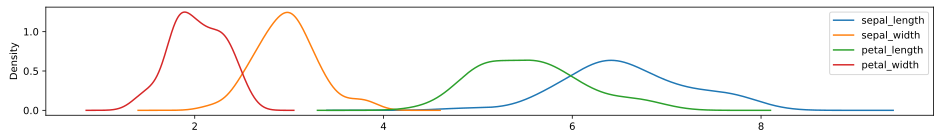

In [17]:
iris.groupby("variety").plot.kde(legend=True, figsize=(16, 2))

/var/folders/0t/s0c95rbs6ds7w_b0d471p0kc0000gn/T/ipykernel_9426/838838217.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


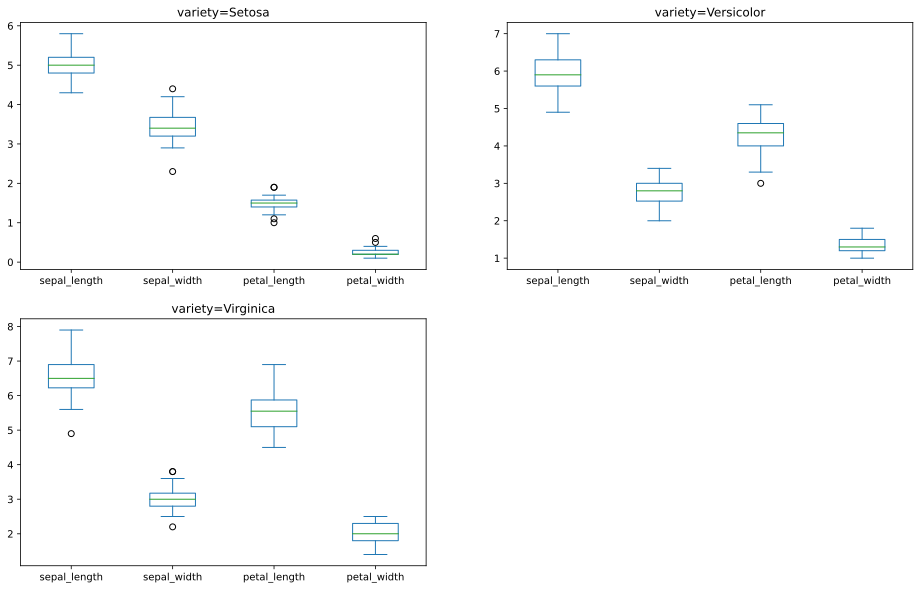

In [18]:
fig = plt.figure(figsize=(16, 10))
for n, (klass, grp) in enumerate(iris.groupby("variety")):
    location = 220+n+1
    axes = fig.add_subplot(location)

    grp.drop("variety", axis=1).plot.box(ax=axes)
    axes.set_title(f"variety={klass}")

fig.show()

# Resampler

In [19]:
import pandas as pd

import random
random.seed(233)

dt = pd.date_range(start="20200101", end="20220101", freq="D").set_names("datetime")
data = pd.DataFrame(
    [random.randrange(100, 10000) for _ in range(len(dt))],
    index=dt,
    columns=["sales"],
)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 2020-01-01 to 2022-01-01
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   732 non-null    int64
dtypes: int64(1)
memory usage: 11.4 KB


,sales
datetime,
2020-01-01,2956
2020-01-02,8704
2020-01-03,3881
2020-01-04,8031
2020-01-05,9124


In [20]:
data.resample("Y").sum()

,sales
datetime,
2020-12-31,1850914
2021-12-31,1901049
2022-12-31,2581


In [21]:
data.resample("2W")

In [22]:
dt.to_series().resample("3M")

In [23]:
dt.to_period("2W").to_series().resample("3d")

In [24]:
# data.reset_index().resample("4d")  # raise type error here.

In [25]:
data = data.reset_index()
data.head()

,datetime,sales
0,2020-01-01,2956
1,2020-01-02,8704
2,2020-01-03,3881
3,2020-01-04,8031
4,2020-01-05,9124


In [26]:
data.groupby(pd.Grouper(key="datetime", freq="Y")).sum()

,sales
datetime,
2020-12-31,1850914
2021-12-31,1901049
2022-12-31,2581


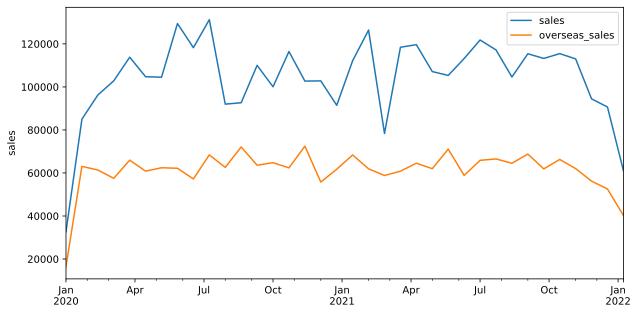

In [27]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)

random.seed(233)

(
    data.set_index("datetime")
    .assign(
        overseas_sales = [random.randrange(1000, 5000) for _ in range(len(dt))],
    )
    .resample("3W")
    .sum()
    .plot.line(
        figsize=(10, 5),
        ylabel="sales",
        xlabel="",
        ax=ax,
    )
)
plt.show()

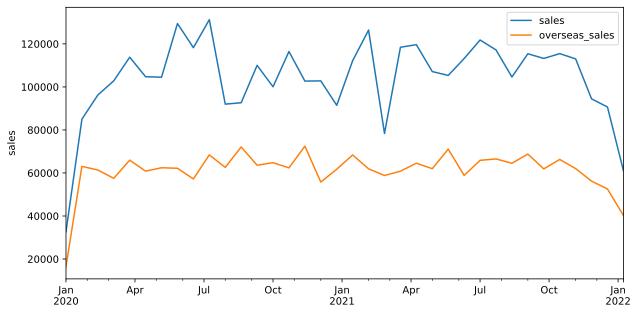

In [28]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)

random.seed(233)

(
    data.assign(
        overseas_sales = [
            random.randrange(1000, 5000) for _ in range(len(dt))
        ],
    )
    .groupby(pd.Grouper(key="datetime", freq="3W"))
    .sum()
    .plot.line(
        figsize=(10, 5),
        ylabel="sales",
        xlabel="",
        ax=ax,
    )
)
plt.show()